# From Chaos to Pattern

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from itertools import product
import random

### Plot size:
Fixing the default size of the plot:

In [5]:
boxsize = 10

# distance between the object and the center of the box
l = 1

# Positions of the objects (stationary stars):
Objects here have masses and exert the force of gravity on the free moving body. (discussed later)

In [10]:
yellow_magnet = (boxsize/2-l,boxsize/2+l)
red_magnet = (boxsize/2+0.866,boxsize/2)
blue_magnet = (boxsize/2-l, boxsize/2-l)

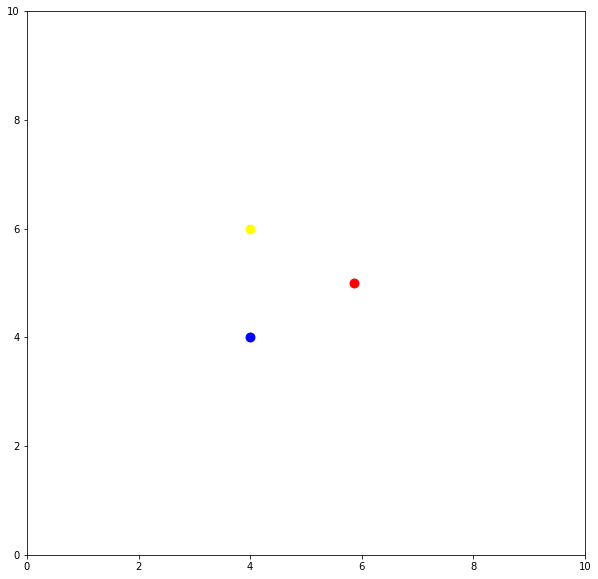

In [11]:
# lists containing the fixed positions of objects:
x_fixed = [yellow_magnet[0],red_magnet[0],blue_magnet[0]] 
y_fixed = [yellow_magnet[1],red_magnet[1],blue_magnet[1]]

# Masses:
fixed_masses = [1,1,1]

# Color of the  fixed objects:
colors = ('yellow','red','blue')

plt.figure(figsize=(boxsize,boxsize))
for i in range(3):
    plt.scatter(x_fixed[i],y_fixed[i],c=colors[i],s=80)
plt.xlim(0,boxsize)
plt.ylim(0,boxsize)
plt.show()

## Update values:
*Update* the values of the **position and velocity** of the planet at each step.

The function will take the previous position and velocity and return the next position and velocity of the planet.

In [12]:
# Taking the random planet to react with the gravity of these three stars.
def step(x0,y0,vx0,vy0,dt):
    
    
    counter = False
    vx1 = 0
    vy1 = 0
    
    ax = 0
    ay = 0
    for i in range(len(fixed_masses)):
        x_dist = x_fixed[i] - x0
        y_dist = y_fixed[i] - y0
        Rsq = x_dist**2 + y_dist**2
        # If the distance between negligible, then break the loop
        if Rsq <= 0.01:
          
            index_of_color = i # use this index to access the colors tuple
            vx1 = 0
            vy1 = 0
            #stop the loop by setting the counter = True
            counter = True            
            return x0,y0,vx1,vy1, counter, index_of_color          
        
        #Acc (due to 3 bodies)
        a = G*fixed_masses[i]/Rsq
        ax+=a * x_dist/np.sqrt(Rsq) 
        ay+=a * y_dist/np.sqrt(Rsq) 
    
    
    vx1 = vx0 + ax*dt
    vy1 = vy0 + ay*dt 
    x1 = x0 + vx1*dt
    y1 = y0 + vy1*dt
    
    
    return x1, y1, vx1, vy1,counter, None

It has stopped at blue
444


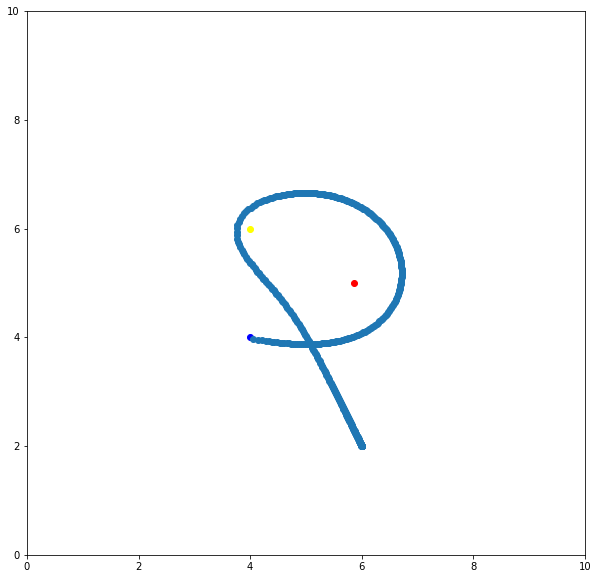

In [14]:
# Setting initial position (x0, y0) of planet to be random at first.
random_x = np.random.randint(0,boxsize)
random_y = np.random.randint(0,boxsize)
x0 = random_x
y0 = random_y

# Mass of the planet
mass = 1
# Force of the gravity: (gravitational constant)
G = 0.05

# infintesimal change in time.
dt=0.1

# Initial velocities kept at 0
vx0 = 0
vy0 = 0

#Make lists:
x_values = []
y_values = []
time_values = []

# Run loop for 3000 * dt time.
for i in range(3000):
    # Update the position and velocity of the planet. 
    x1,y1,vx1,vy1,counter,color_index = step(x0,y0,vx0,vy0,dt=dt)
    
    # Add the position values into lists (for plotting purposes)
    x_values.append(x0)
    y_values.append(y0)
    # for plotting purposes
    time_values.append(i)
    
    # The counter tells if the planet has come too close to the stars. If so, stop the loop.
    if counter:
        # stop the loop
        print(f'It has stopped at {colors[color_index]}')
        print(i)
        break
    # Update the positions
    x0 = x1
    y0 = y1
    vx0 = vx1 
    vy0 = vy1 

# Plot the result:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.scatter(x_fixed[i],y_fixed[i],c=colors[i])
plt.scatter(x_values,y_values)
plt.xlim(0,boxsize)
plt.ylim(0,boxsize)
plt.show()

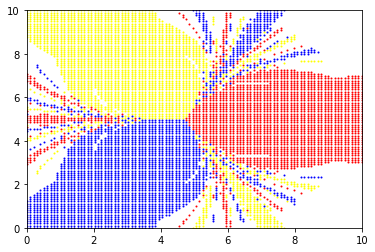

In [15]:
# Mark the point as the color to which it landed on.
# All constants:
mass = 1
G = 0.5

dt =0.01
x_ = np.linspace(0,10,100)
y_ = np.linspace(0,10,100)

v_x0 = 0
v_y0 = 0

# red coordinates
red_x = []
red_y = []

# Yellow coordinates
yellow_x = []
yellow_y = []

# Blue coordinates
blue_x  =[]
blue_y = []

for x_0,y_0 in product(x_,y_):
    x0,y0 = x_0,y_0
    vx0,vy0 = v_x0,v_y0
    for i in range(3000):
        x1,y1,vx1,vy1,counter, color_index = step(x0,y0,vx0,vy0,dt=dt)
        if counter:
            print(counter)
            #print(f'It has stopped at {colors[color_index]}')
            if colors[color_index] == 'yellow':
                yellow_x.append(x_0)
                yellow_y.append(y_0)
            elif colors[color_index] == 'red':
                red_x.append(x_0)
                red_y.append(y_0)
            elif colors[color_index] == 'blue':
                blue_x.append(x_0)
                blue_y.append(y_0)
            break

        x0 = x1
        y0 = y1
        vx0 = vx1
        vy0 = vy1
    print(f"Inital x = {x_0}\nInitial y = {y_0}")
    clear_output(wait=True)
plt.scatter(red_x,red_y, c='red', s=1)
plt.scatter(yellow_x,yellow_y,c='yellow', s=1)
plt.scatter(blue_x,blue_y,c='blue', s=1)

plt.xlim(0,boxsize)
plt.ylim(0,boxsize)
plt.savefig('NicePattern.png')
plt.show()

# Note:
Since this takes a fairly long time to compute, I have modified the `step()` function to run directly on cpu using `numba` library.

In [17]:
from numba import jit

In [20]:
@jit(nopython=True)
def step_directcpu(x0,y0,vx0,vy0,dt):
    
    G = 0.5
    counter = False
    vx1 = 0
    vy1 = 0
    
    ax = 0
    ay = 0
    yellow_magnet = (boxsize/2-l,boxsize/2+l)
    red_magnet = (boxsize/2+0.866,boxsize/2)
    blue_magnet = (boxsize/2-l, boxsize/2-l)

    # lists containing the fixed positions of magnets:
    x_fixed = [yellow_magnet[0],red_magnet[0],blue_magnet[0]] 
    y_fixed = [yellow_magnet[1],red_magnet[1],blue_magnet[1]]

    fixed_masses = [1,1,1]
    colors = ('yellow','red','blue')
    
    #for i in range(len(fixed_masses)):

    for i in range(3):
        x_dist = x_fixed[i] - x0
        y_dist = y_fixed[i] - y0
        Rsq = x_dist**2 + y_dist**2
        # If the distance between negligible, then break the loop
        if Rsq <= 0.01:
          
            index_of_color = i # use this index to access the colors tuple
            vx1 = 0
            vy1 = 0
            #stop the loop by setting the counter = True
            counter = True            
            return x0,y0,vx1,vy1, counter, index_of_color          
        
        #Acc (due to 3 bodies)
        a = G*fixed_masses[i]/Rsq
        ax = ax + a * x_dist/np.sqrt(Rsq) 
        ay = ay + a * y_dist/np.sqrt(Rsq) 
    
    vx1 = vx0 + ax*dt  
    vy1 = vy0 + ay*dt
    x1 = x0 + vx1*dt
    y1 = y0 + vy1*dt
    
    
    return x1, y1, vx1, vy1,counter, None

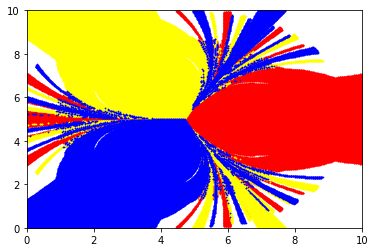

In [22]:
# Mark the point as the color to which it landed on.
# All constants:
mass = 1
G = 0.5

dt =0.01
x_ = np.linspace(0,10,500)
y_ = np.linspace(0,10,500)

v_x0 = 0
v_y0 = 0

# red coordinates
red_x = []
red_y = []

# Yellow coordinates
yellow_x = []
yellow_y = []

# Blue coordinates
blue_x  =[]
blue_y = []

for x_0,y_0 in product(x_,y_):
    x0,y0 = x_0,y_0
    vx0,vy0 = v_x0,v_y0
    for i in range(3000):
        x1,y1,vx1,vy1,counter, color_index = step_directcpu(x0,y0,vx0,vy0,dt=dt)
        if counter:
            print(counter)
            #print(f'It has stopped at {colors[color_index]}')
            if colors[color_index] == 'yellow':
                yellow_x.append(x_0)
                yellow_y.append(y_0)
            elif colors[color_index] == 'red':
                red_x.append(x_0)
                red_y.append(y_0)
            elif colors[color_index] == 'blue':
                blue_x.append(x_0)
                blue_y.append(y_0)
            break

        x0 = x1
        y0 = y1
        vx0 = vx1
        vy0 = vy1
    print(f"Inital x = {x_0}\nInitial y = {y_0}")
    clear_output(wait=True)
plt.scatter(red_x,red_y, c='red', s=0.5)
plt.scatter(yellow_x,yellow_y,c='yellow', s=0.5)
plt.scatter(blue_x,blue_y,c='blue', s=0.5)

plt.xlim(0,boxsize)
plt.ylim(0,boxsize)
plt.savefig('NicePattern.png')
plt.show()

# Note:
This also takes fairly long for my computer so I will modify the code (`step` function) for working it on GPU:

In [23]:
from numba import cuda

In [51]:
# number of outputs i want from the step function
vals = np.array([0,0,0,0,0,0])

@cuda.jit
def step_gpu(x0,y0,vx0,vy0,dt,vals):
    
    G = 0.5
    counter = False
    vx1 = 0
    vy1 = 0
    
    ax = 0
    ay = 0
    yellow_magnet = (boxsize/2-l,boxsize/2+l)
    red_magnet = (boxsize/2+0.866,boxsize/2)
    blue_magnet = (boxsize/2-l, boxsize/2-l)

    # lists containing the fixed positions of magnets:
    x_fixed = (yellow_magnet[0],red_magnet[0],blue_magnet[0])
    y_fixed = (yellow_magnet[1],red_magnet[1],blue_magnet[1])

    fixed_masses = (1,1,1)
    colors = ('yellow','red','blue')
    
    #for i in range(len(fixed_masses)):

    for i in range(3):
        x_dist = x_fixed[i] - x0
        y_dist = y_fixed[i] - y0
        Rsq = x_dist**2 + y_dist**2
        # If the distance between negligible, then break the loop
        if Rsq <= 0.01:
          
            index_of_color = i # use this index to access the colors tuple
            vx1 = 0
            vy1 = 0
            #stop the loop by setting the counter = True
            counter = True  
            vals[0] = x0
            vals[1] = y0
            vals[2] = vx1
            vals[3] = vy1
            vals[4] = counter
            vals[5] = index_of_color
            # return x0,y0,vx1,vy1, counter, index_of_color      
        
        #Acc (due to 3 bodies)
        a = G*fixed_masses[i]/Rsq
        ax = ax + a * x_dist/(Rsq)**2 
        ay = ay + a * y_dist/(Rsq)**2 
    
    vx1 = vx0 + ax*dt  
    vy1 = vy0 + ay*dt
    x1 = x0 + vx1*dt
    y1 = y0 + vy1*dt
    
    vals[0] = x0
    vals[1] = y0
    vals[2] = vx1
    vals[3] = vy1
    vals[4] = counter
    vals[5] = index_of_color
    #return x1, y1, vx1, vy1,counter, None

In [62]:
# Mark the point as the color to which it landed on.
# All constants:
mass = 1
G = 0.5

dt =0.01
x_ = np.linspace(0,10,1000)
y_ = np.linspace(0,10,1000)

v_x0 = 0
v_y0 = 0

# red coordinates
red_x = []
red_y = []

# Yellow coordinates
yellow_x = []
yellow_y = []

# Blue coordinates
blue_x  =[]
blue_y = []

for x_0,y_0 in product(x_,y_):
    x0,y0 = x_0,y_0
    vx0,vy0 = v_x0,v_y0
    for i in range(3000):
        step_gpu[(16,16),(10,10)](x0,y0,vx0,vy0,dt,vals)
        if counter:
            print(counter)
            #print(f'It has stopped at {colors[color_index]}')
            if colors[color_index] == 'yellow':
                yellow_x.append(x_0)
                yellow_y.append(y_0)
            elif colors[color_index] == 'red':
                red_x.append(x_0)
                red_y.append(y_0)
            elif colors[color_index] == 'blue':
                blue_x.append(x_0)
                blue_y.append(y_0)
            break

        x0 = vals[0]
        y0 = vals[1]
        vx0 = vals[2]
        vy0 = vals[3]
    print(f"Inital x = {x_0}\nInitial y = {y_0}")
    clear_output(wait=True)
plt.scatter(red_x,red_y, c='red', s=0.5)
plt.scatter(yellow_x,yellow_y,c='yellow', s=0.5)
plt.scatter(blue_x,blue_y,c='blue', s=0.5)

plt.xlim(0,boxsize)
plt.ylim(0,boxsize)
plt.savefig('NicePattern.png')
plt.show()

KeyboardInterrupt: 